<a href="https://colab.research.google.com/github/MRazin172/LabProgram2/blob/main/LabProgram2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np

In [36]:
crime = pd.read_csv("/content/Program_2_Dataset.csv")

In [37]:
crime.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [38]:
crime.shape

(506, 14)

In [39]:
crime.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

No nulls

In [40]:
crime.columns

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms ', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')

In [41]:
X = crime[['Avg_rooms ','Distance','Property_TaxRate','Non_Retail_Acres']]  #the features that we have taken is Avg_rooms, Distance, Property_TaxRate and Non_Retail_Acres
y = crime['MValue']  # our target variable is MValue

In [42]:
vif=pd.Series([variance_inflation_factor(X.values,idx)
    for idx in range(X.shape[1])],
    index=X.columns)

print(vif)

Avg_rooms           16.747965
Distance             6.880607
Property_TaxRate    13.861510
Non_Retail_Acres     9.598374
dtype: float64


Variance Inflation Factors for the predicator variables are obtained.
1. HERE, WE CAN SEE THAT THE Avg_rooms IS 16.75, THIS MEANS THAT IT HIGHLY CORRELATED WIHT THE OTHRE PREDICATOR VARIABLES.
2. THE Distance HAS 6.9 WHICH IS MODERATELY CORRELATED.
3. THE Property_TaxRate AND Non_Retail_Acres HAS 13.9 AND 9.6 RESPECTIVELY, WHICH IS ALSO HIGH CORERELATION.

---

As Property_TaxRate and Avg_rooms has more than 10 vif, they cannot be considered as factors for the model.


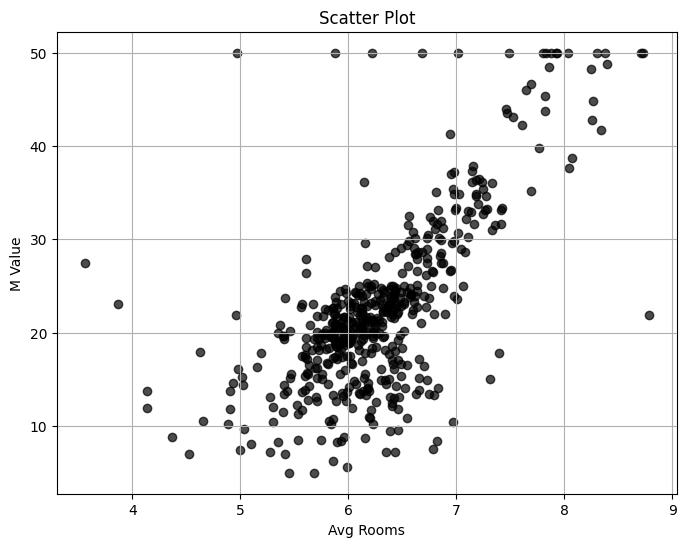

In [43]:
column1 = crime['Avg_rooms ']
column2 = crime['MValue']

plt.figure(figsize=(8, 6))
plt.scatter(column1, column2, color='black', alpha=0.7)
plt.title('Scatter Plot')
plt.xlabel('Avg Rooms')
plt.ylabel('M Value')
plt.grid(True)
plt.show()

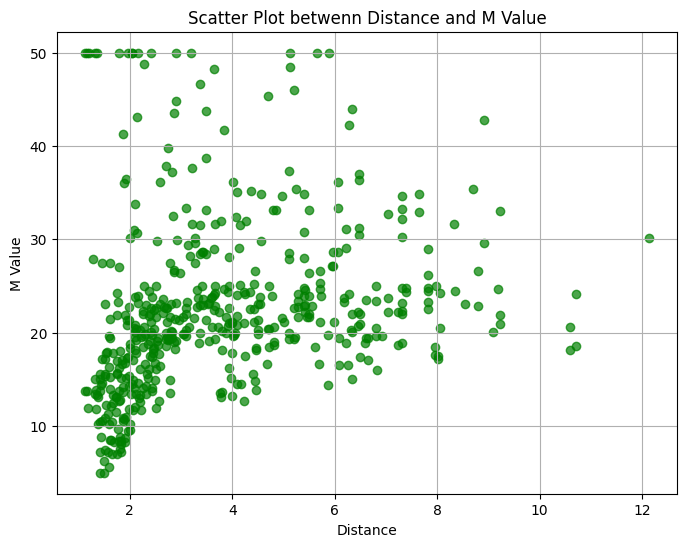

In [44]:
column1 = crime['Distance']
column2 = crime['MValue']

plt.figure(figsize=(8, 6))
plt.scatter(column1, column2, color='green', alpha=0.7)
plt.title('Scatter Plot betwenn Distance and M Value')
plt.xlabel('Distance')
plt.ylabel('M Value')
plt.grid(True)
plt.show()

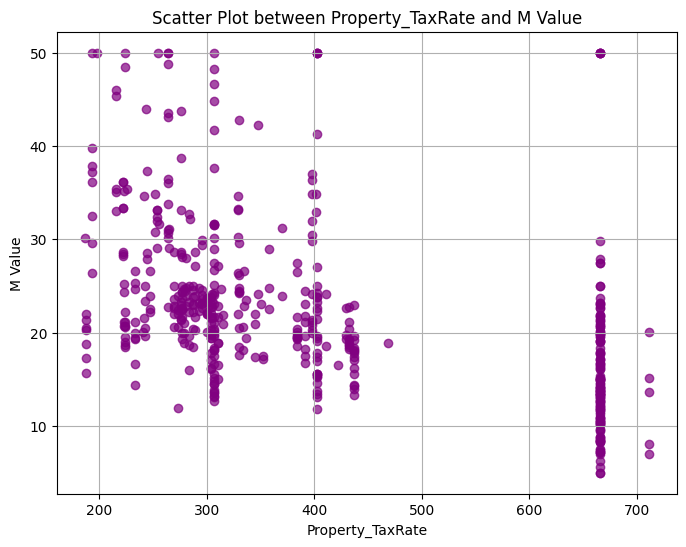

In [45]:
column1 = crime['Property_TaxRate']
column2 = crime['MValue']

plt.figure(figsize=(8, 6))
plt.scatter(column1, column2, color='purple', alpha=0.7)
plt.title('Scatter Plot between Property_TaxRate and M Value')
plt.xlabel('Property_TaxRate')
plt.ylabel('M Value')
plt.grid(True)
plt.show()

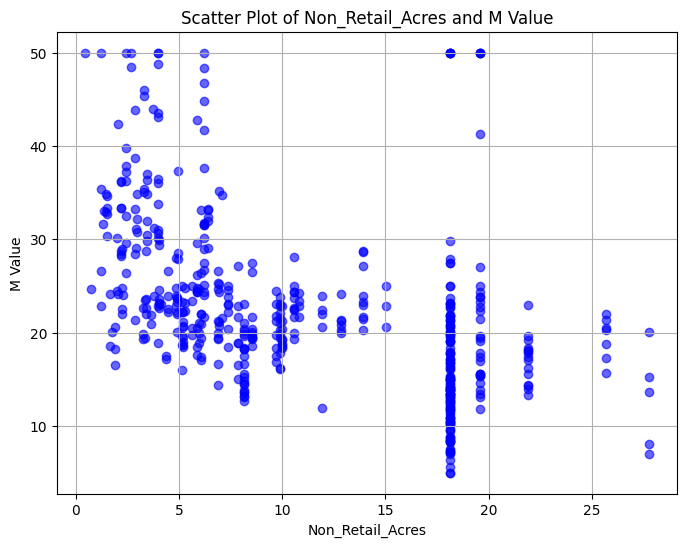

In [46]:
column1 = crime['Non_Retail_Acres']
column2 = crime['MValue']

plt.figure(figsize=(8, 6))
plt.scatter(column1, column2, color='blue', alpha=0.6)
plt.title('Scatter Plot of Non_Retail_Acres and M Value')
plt.xlabel('Non_Retail_Acres')
plt.ylabel('M Value')
plt.grid(True)
plt.show()

In [47]:
Xnew = crime[['Distance','Non_Retail_Acres']]  #the updated features are Distance and Non_Retail_Acres
y = crime['MValue']

In [48]:
# splitting the dataset into train and test sets in 67 by 33 ratio
Xnew_train, Xnew_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.33, random_state=42)

In [49]:
#the model
model=LinearRegression()
model.fit(Xnew_train,y_train)

LinearRegression()

In [50]:
coefficients = model.coef_
print("Coefficients:", coefficients)

intercept = model.intercept_
print("Intercept:", intercept)


Coefficients: [-1.27856928 -0.9452116 ]
Intercept: 38.091225709521446


In [56]:
y_train_pred = model.predict(Xnew_train)
y_test_pred = model.predict(Xnew_test)


mse_tr = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
n_train, k_train = Xnew_train.shape[0], Xnew_train.shape[1]
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - k_train - 1))

mse_te = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
n_test, k_test = Xnew_test.shape[0], Xnew_test.shape[1]
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))

print("Training Set Evaluation:")
print("Mean Squared Error (MSE) on Training Set:", mse_tr)
print("R-squared (R2) on Training Set:", r2_train)
print("Adjusted R-squared (R2) on Training Set:", adj_r2_train)


print("\nTesting Set Evaluation:")
print("Mean Squared Error (MSE) on Testing Set:", mse_te)
print("R-squared (R2) on Testing Set:", r2_test)
print("Adjusted R-squared (R2) on Testing Set:", adj_r2_test)


Training Set Evaluation:
Mean Squared Error (MSE) on Training Set: 67.67782670758363
R-squared (R2) on Training Set: 0.2581499484166435
Adjusted R-squared (R2) on Training Set: 0.25373417430007594

Testing Set Evaluation:
Mean Squared Error (MSE) on Testing Set: 55.770639488944795
R-squared (R2) on Testing Set: 0.20665217673469405
Adjusted R-squared (R2) on Testing Set: 0.19697720328023915


INFERENCE: 1. In this new model, we can see that the mse value for both training and testing is 67.7 and 55.7, this shows that it gave better results in testing.

2. We got the adjusted values of R-squared as 0.25 and 0.20. this tells us that the model is not that good.